# Problem 4

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

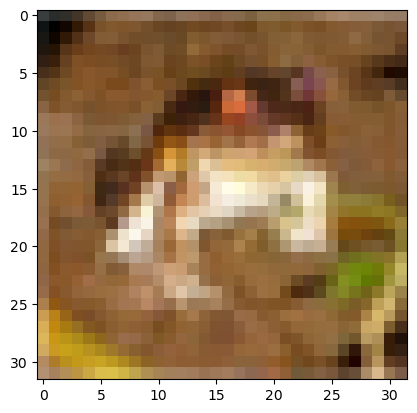

frog 


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
z1, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(z1))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### (a) Train an image with an error less than 1e-5

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, k):
        super(Net, self).__init__()
        self.k = k
        self.B = nn.Linear(3 * 32 * 32, self.k, bias=False)
        self.A = nn.Linear(self.k, 3 * 32 * 32, bias=False)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32) # [batchsize, 3072]
        x = self.B(x)
        x = F.relu(x)
        x = self.A(x) 
        return x

f = Net(k=1024)

In [6]:
# evaluating data points with Mean Square Error (MSE)
def L(x, fx):
    x = x.view(-1, 3 * 32 * 32)
    diff = x - fx 
    return 0.5 * (torch.norm(diff, p=2)**2)

In [7]:
steps = 100
lr = 1e-3

def train(steps, lr):
    losses = []
    for i in range(steps):
        # Generate Prediction
        fx = f(z1)
        # Get the loss and perform backpropagation
        loss = L(z1, fx)
        losses.append(loss)
        loss.backward() # get gradient
        # Let's update the weights
        with torch.no_grad():
            f.A.weight -= lr * f.A.weight.grad
            f.B.weight -= lr * f.B.weight.grad
            # Set the gradients to zero
            f.A.weight.grad.zero_()
            f.B.weight.grad.zero_()
        print(f"step {i}: Loss: {loss}")
    print(f"minimal loss achieved: {min(losses)}")

In [8]:
train(steps, lr)

step 0: Loss: 325.329833984375
step 1: Loss: 273.7133483886719
step 2: Loss: 244.14212036132812
step 3: Loss: 198.89141845703125
step 4: Loss: 139.93614196777344
step 5: Loss: 81.38546752929688
step 6: Loss: 39.56410598754883
step 7: Loss: 17.088428497314453
step 8: Loss: 6.952592849731445
step 9: Loss: 2.7564098834991455
step 10: Loss: 1.081404447555542
step 11: Loss: 0.4225172996520996
step 12: Loss: 0.1648177206516266
step 13: Loss: 0.06425297260284424
step 14: Loss: 0.025042491033673286
step 15: Loss: 0.009759376756846905
step 16: Loss: 0.003803201951086521
step 17: Loss: 0.0014820826472714543
step 18: Loss: 0.0005775515455752611
step 19: Loss: 0.00022506603272631764
step 20: Loss: 8.770507702138275e-05
step 21: Loss: 3.41781233146321e-05
step 22: Loss: 1.3318700439413078e-05
step 23: Loss: 5.19000332133146e-06
step 24: Loss: 2.0226091237418586e-06
step 25: Loss: 7.881436658863095e-07
step 26: Loss: 3.0718047128175385e-07
step 27: Loss: 1.196830083927125e-07
step 28: Loss: 4.663068

### (b) Visualize

#### Training image

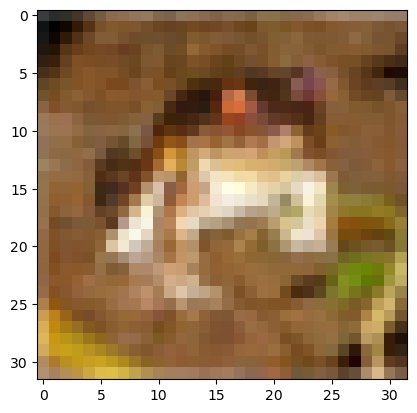

In [9]:
pred = f(z1)
pred = pred.reshape_as(z1)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

#### Random training image

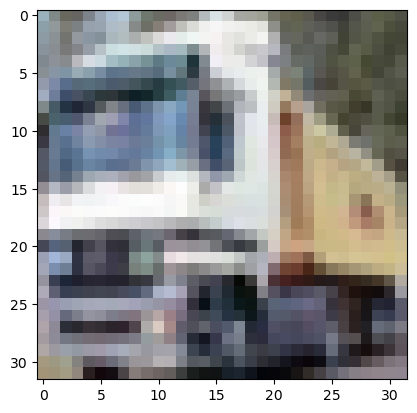

truck


In [10]:
# Random training image
random_train, labels = next(dataiter)
imshow(torchvision.utils.make_grid(random_train))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

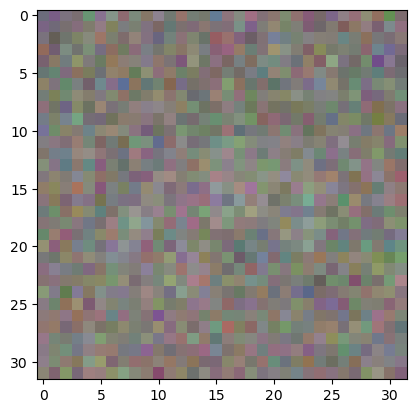

In [11]:
pred = f(random_train)
pred = pred.reshape_as(random_train)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

#### Random test image

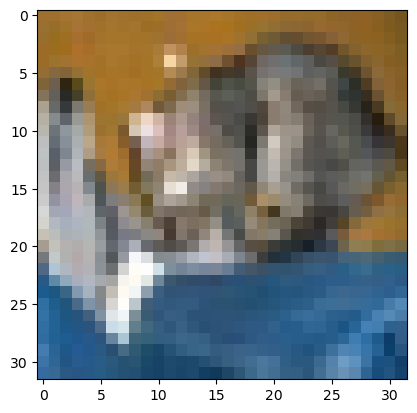

cat  


In [12]:
# get some random training images
dataiter = iter(testloader)
random_test, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(random_test))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

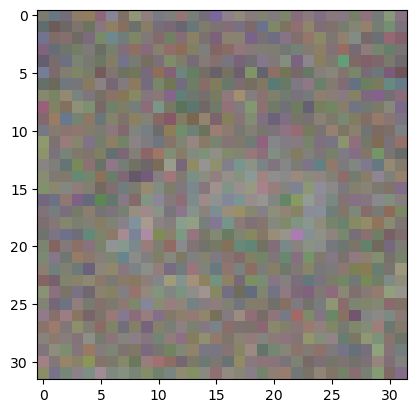

In [13]:
pred = f(random_test)
pred = pred.reshape_as(random_test)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

#### Random noise

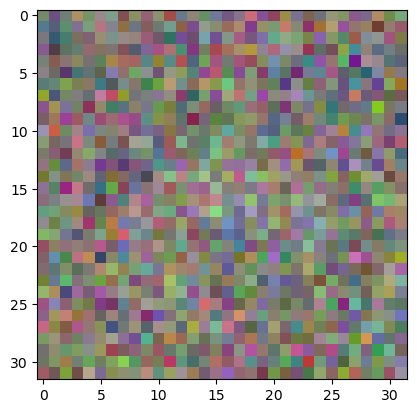

In [14]:
noise = torch.normal(0, 1 , size=(1, 3, 32, 32), requires_grad=False)
pred = f(noise)
pred = pred.reshape_as(noise)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

#### All zeros

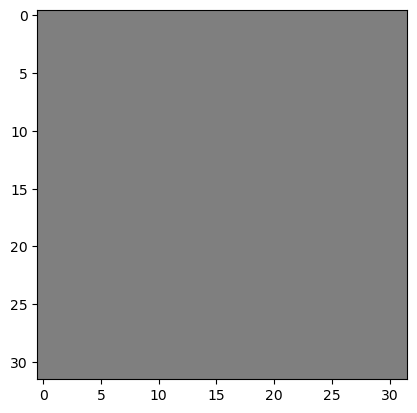

In [15]:
zeros = torch.normal(0, 0 , size=(1, 3, 32, 32), requires_grad=False)
pred = f(zeros)
pred = pred.reshape_as(zeros)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

### (c) Training on 2 images

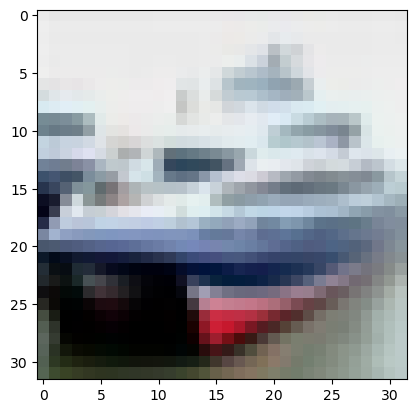

ship 


In [16]:
z2, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(z2))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [17]:
steps = 1000
lr = 1e-4
f = Net(k=1024)

def train2(steps, lr):
    losses = []
    for i in range(steps):
        if i % 2 == 0:
            x = z1
        else:
            x = z2
        # Generate Prediction
        fx = f(x)
        # Get the loss and perform backpropagation
        loss = L(x, fx)
        losses.append(loss)
        loss.backward() # get gradient
        # Let's update the weights
        with torch.no_grad():
            f.A.weight -= lr * f.A.weight.grad
            f.B.weight -= lr * f.B.weight.grad
            # Set the gradients to zero
            f.A.weight.grad.zero_()
            f.B.weight.grad.zero_()
        print(f"step {i}: Loss: {loss}")
    print(f"minimal loss achieved: {min(losses)}")

In [18]:
train2(steps, lr)

step 0: Loss: 327.88580322265625
step 1: Loss: 700.64794921875
step 2: Loss: 316.836669921875
step 3: Loss: 652.8576049804688
step 4: Loss: 308.36370849609375
step 5: Loss: 625.0802612304688
step 6: Loss: 301.4964904785156
step 7: Loss: 606.9642333984375
step 8: Loss: 295.74029541015625
step 9: Loss: 592.322998046875
step 10: Loss: 290.8751525878906
step 11: Loss: 578.8724365234375
step 12: Loss: 286.5518493652344
step 13: Loss: 565.206787109375
step 14: Loss: 282.59967041015625
step 15: Loss: 550.6947021484375
step 16: Loss: 278.98480224609375
step 17: Loss: 534.9141235351562
step 18: Loss: 275.56146240234375
step 19: Loss: 517.6426391601562
step 20: Loss: 272.2120361328125
step 21: Loss: 498.6922912597656
step 22: Loss: 268.87908935546875
step 23: Loss: 478.0023193359375
step 24: Loss: 265.52301025390625
step 25: Loss: 455.56219482421875
step 26: Loss: 262.07733154296875
step 27: Loss: 431.41168212890625
step 28: Loss: 258.5296936035156
step 29: Loss: 405.76983642578125
step 30: Loss

step 242: Loss: 0.1554296463727951
step 243: Loss: 0.00035482182283885777
step 244: Loss: 0.14272062480449677
step 245: Loss: 0.0003263828402850777
step 246: Loss: 0.13105101883411407
step 247: Loss: 0.0003002227458637208
step 248: Loss: 0.12033582478761673
step 249: Loss: 0.00027616112492978573
step 250: Loss: 0.11049695312976837
step 251: Loss: 0.00025402678875252604
step 252: Loss: 0.1014627143740654
step 253: Loss: 0.00023365739616565406
step 254: Loss: 0.093167245388031
step 255: Loss: 0.0002149244537577033
step 256: Loss: 0.0855502188205719
step 257: Loss: 0.0001976849016500637
step 258: Loss: 0.07855595648288727
step 259: Loss: 0.00018182701023761183
step 260: Loss: 0.07213369756937027
step 261: Loss: 0.00016723503358662128
step 262: Loss: 0.06623657792806625
step 263: Loss: 0.00015380996046587825
step 264: Loss: 0.06082165613770485
step 265: Loss: 0.00014145617024041712
step 266: Loss: 0.055849481374025345
step 267: Loss: 0.00013009064423386008
step 268: Loss: 0.051283791661262

step 466: Loss: 1.1052125046262518e-05
step 467: Loss: 2.962218914603909e-08
step 468: Loss: 1.0147947250516154e-05
step 469: Loss: 2.7493687326796135e-08
step 470: Loss: 9.317822332377546e-06
step 471: Loss: 2.5556525784509176e-08
step 472: Loss: 8.555300155421719e-06
step 473: Loss: 2.3768393475620542e-08
step 474: Loss: 7.855060175643303e-06
step 475: Loss: 2.2159898804829936e-08
step 476: Loss: 7.212388936750358e-06
step 477: Loss: 2.0673804002058205e-08
step 478: Loss: 6.622700766456546e-06
step 479: Loss: 1.9323568523077483e-08
step 480: Loss: 6.080318598833401e-06
step 481: Loss: 1.805579330493856e-08
step 482: Loss: 5.583051915891701e-06
step 483: Loss: 1.6923054957374006e-08
step 484: Loss: 5.126212272443809e-06
step 485: Loss: 1.587434894645412e-08
step 486: Loss: 4.70667919216794e-06
step 487: Loss: 1.4915473300902704e-08
step 488: Loss: 4.321507276472403e-06
step 489: Loss: 1.4041192208935627e-08
step 490: Loss: 3.967792963521788e-06
step 491: Loss: 1.3205747606548357e-08
s

step 686: Loss: 5.556566762265902e-09
step 687: Loss: 5.113838796866332e-10
step 688: Loss: 5.403820058091924e-09
step 689: Loss: 5.009138104306032e-10
step 690: Loss: 5.260434310372375e-09
step 691: Loss: 4.904216477363832e-10
step 692: Loss: 5.1260515832041165e-09
step 693: Loss: 4.799644570674388e-10
step 694: Loss: 4.988945701001057e-09
step 695: Loss: 4.706138811982896e-10
step 696: Loss: 4.860537305972912e-09
step 697: Loss: 4.610543336003303e-10
step 698: Loss: 4.739659331676194e-09
step 699: Loss: 4.5348474975170916e-10
step 700: Loss: 4.625064331520434e-09
step 701: Loss: 4.4431339163431005e-10
step 702: Loss: 4.508954543069876e-09
step 703: Loss: 4.364367756082288e-10
step 704: Loss: 4.3998342746931485e-09
step 705: Loss: 4.2864023441779864e-10
step 706: Loss: 4.297135980380062e-09
step 707: Loss: 4.2113348919237126e-10
step 708: Loss: 4.199149028494276e-09
step 709: Loss: 4.1312925302960934e-10
step 710: Loss: 4.1059671218590665e-09
step 711: Loss: 4.0468442485952494e-10
ste

step 900: Loss: 9.87902759597148e-10
step 901: Loss: 1.2265369275787918e-10
step 902: Loss: 9.774522302663513e-10
step 903: Loss: 1.2144107941480797e-10
step 904: Loss: 9.688080337966198e-10
step 905: Loss: 1.2083745115631928e-10
step 906: Loss: 9.583053239836659e-10
step 907: Loss: 1.1957614065583044e-10
step 908: Loss: 9.502268971672834e-10
step 909: Loss: 1.1928096010915823e-10
step 910: Loss: 9.411618151489165e-10
step 911: Loss: 1.1790395049171565e-10
step 912: Loss: 9.309939486001895e-10
step 913: Loss: 1.1743810091058293e-10
step 914: Loss: 9.214697338499889e-10
step 915: Loss: 1.1575912450823012e-10
step 916: Loss: 9.128005573622033e-10
step 917: Loss: 1.1513515141281516e-10
step 918: Loss: 9.040595494447246e-10
step 919: Loss: 1.1353117751466968e-10
step 920: Loss: 8.957798947051288e-10
step 921: Loss: 1.1309374270407346e-10
step 922: Loss: 8.875238877159575e-10
step 923: Loss: 1.1224709356438822e-10
step 924: Loss: 8.785547844780695e-10
step 925: Loss: 1.1089622969917556e-10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


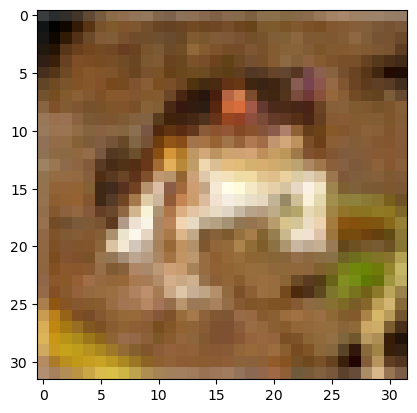

In [19]:
pred = f(z1)
pred = pred.reshape_as(z1)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


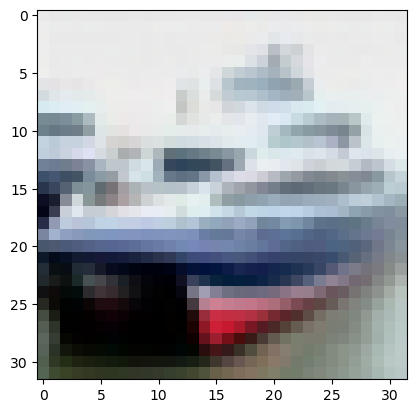

In [20]:
pred = f(z2)
pred = pred.reshape_as(z2)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

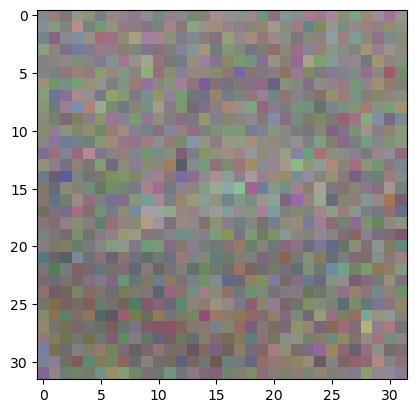

In [21]:
pred = f(random_train)
pred = pred.reshape_as(random_train)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

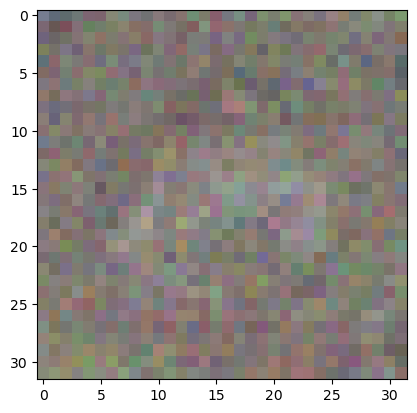

In [22]:
pred = f(random_test)
pred = pred.reshape_as(random_train)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

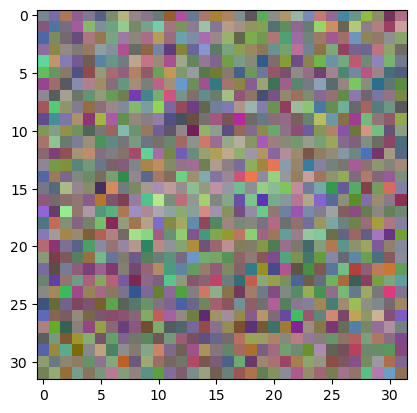

In [23]:
pred = f(noise)
pred = pred.reshape_as(noise)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

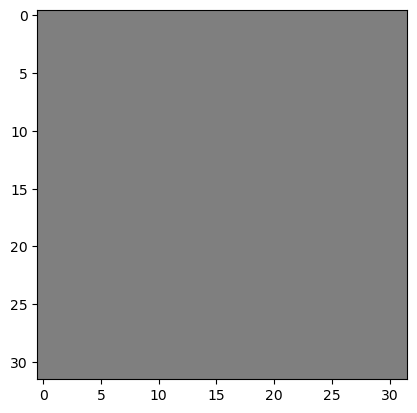

In [24]:
pred = f(zeros)
pred = pred.reshape_as(zeros)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

### (d) $f(x), f^2(x), f^{20}(x)$ 

In [25]:
def fn(x ,n, f):
    for i in range(n):
        x = f(x)
    return x

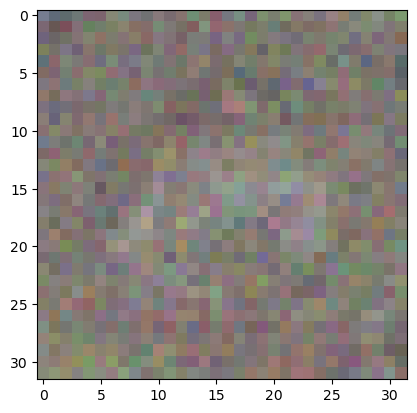

In [26]:
pred = fn(random_test, 1, f)
pred = pred.reshape_as(zeros)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

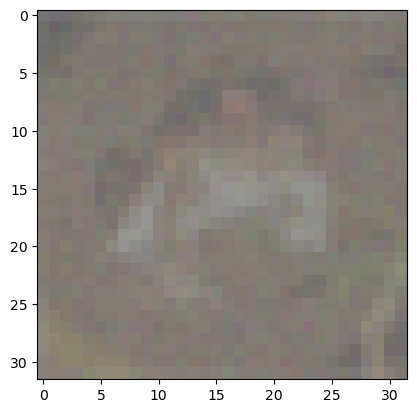

In [27]:
pred = fn(random_test, 2, f)
pred = pred.reshape_as(zeros)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

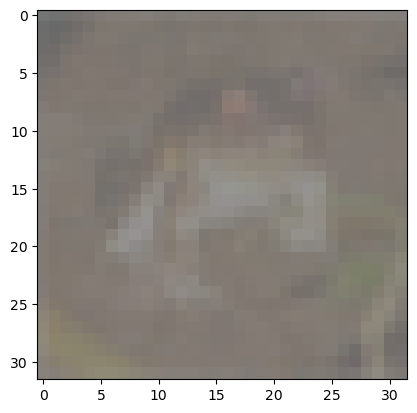

In [28]:
pred = fn(random_test, 20, f)
pred = pred.reshape_as(zeros)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

They become more close to the $z_1$ as $n$ increases (but why not close to $z_2$?). Honestly, I don't understand why this happens theoretically but want to understand it.

### (e)

In [29]:
def add_noise(x):
    return x + torch.normal(0, 1 , size=(1, 3, 32, 32), requires_grad=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


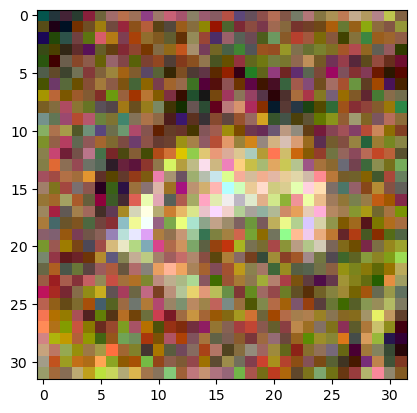

In [30]:
pred = fn(add_noise(z1), 1, f)
pred = pred.reshape_as(z1)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


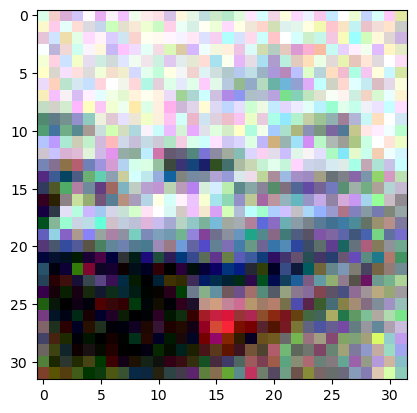

In [31]:
pred = fn(add_noise(z2), 1, f)
pred = pred.reshape_as(z1)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


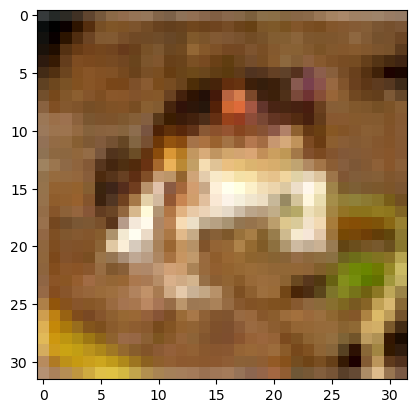

In [32]:
pred = fn(add_noise(z1), 10, f)
pred = pred.reshape_as(z1)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

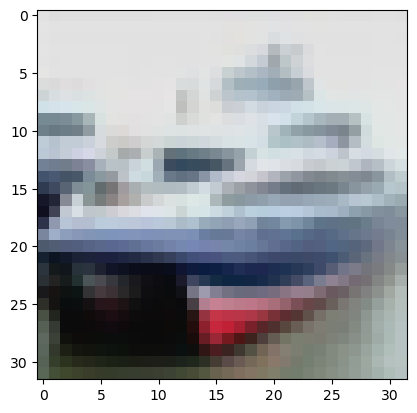

In [33]:
pred = fn(add_noise(z2), 10, f)
pred = pred.reshape_as(z1)
pred = pred.detach()
imshow(torchvision.utils.make_grid(pred))

Noise makes the reconstruction by autoencoder more clear. (but why?)